In [1]:
import pandas as pd

df = pd.read_csv('../data/ai4i2020.csv')
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


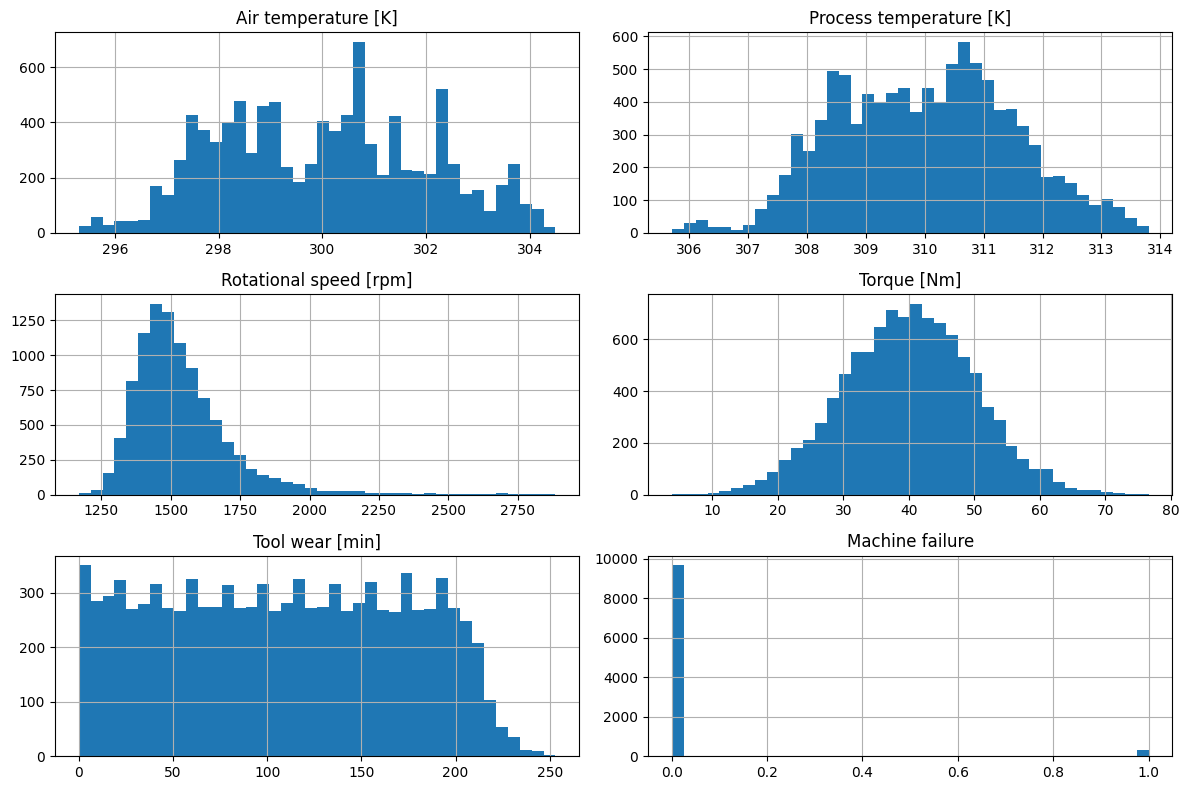

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme für die wichtigsten Sensoren (z.B. Temperaturen)
num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
df[num_cols].hist(figsize=(12,8), bins=40)
plt.tight_layout()
plt.show()

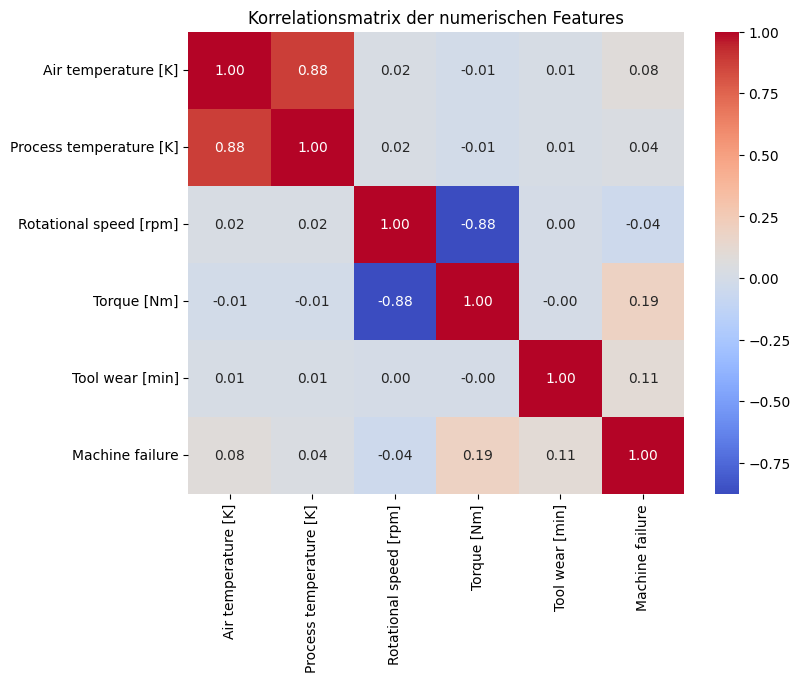

In [13]:
# Korrelationen als Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Korrelationsmatrix der numerischen Features')
plt.show()

TWF: 46 Fehler (0.460% der Daten)
HDF: 115 Fehler (1.150% der Daten)
OSF: 98 Fehler (0.980% der Daten)
RNF: 19 Fehler (0.190% der Daten)
PWF: 95 Fehler (0.950% der Daten)


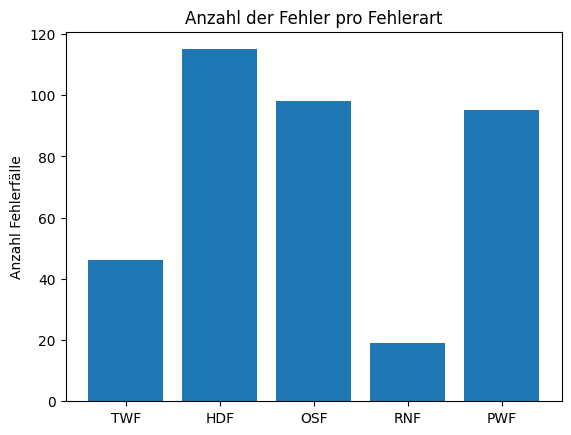

In [16]:
failure_cols = ['TWF', 'HDF', 'OSF', 'RNF', 'PWF']

for col in failure_cols:
    print(f"{col}: {df[col].sum()} Fehler ({df[col].mean()*100:.3f}% der Daten)")

# Oder als Barplot
import matplotlib.pyplot as plt

counts = [df[col].sum() for col in failure_cols]
plt.bar(failure_cols, counts)
plt.title("Anzahl der Fehler pro Fehlerart")
plt.ylabel("Anzahl Fehlerfälle")
plt.show()



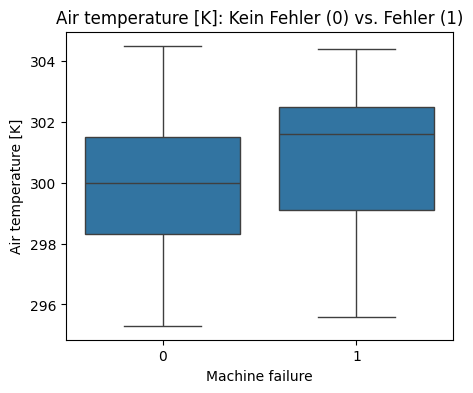

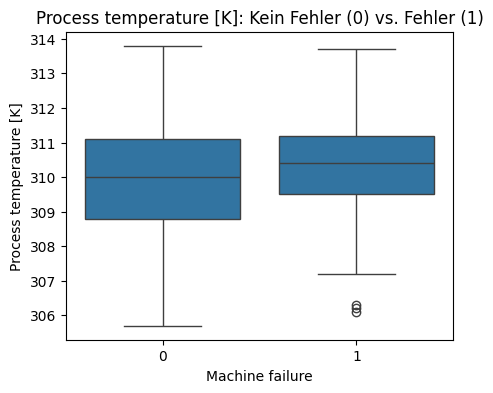

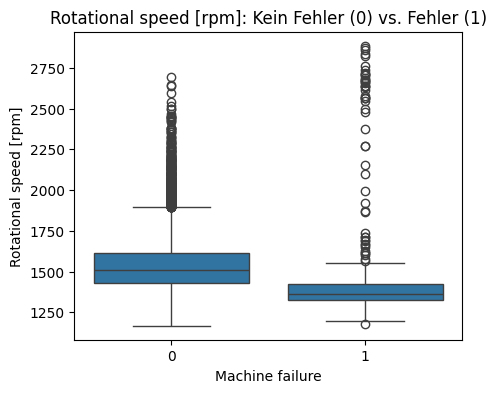

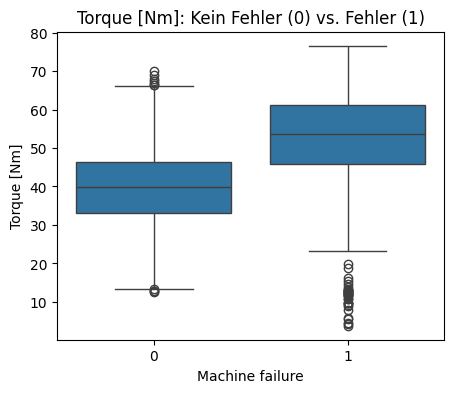

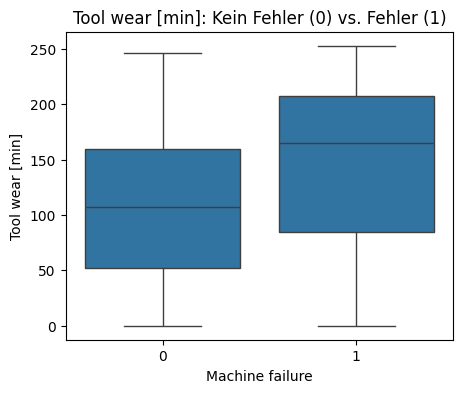

In [20]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for feat in features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='Machine failure', y=feat, data=df)
    plt.title(f"{feat}: Kein Fehler (0) vs. Fehler (1)")
    plt.show()


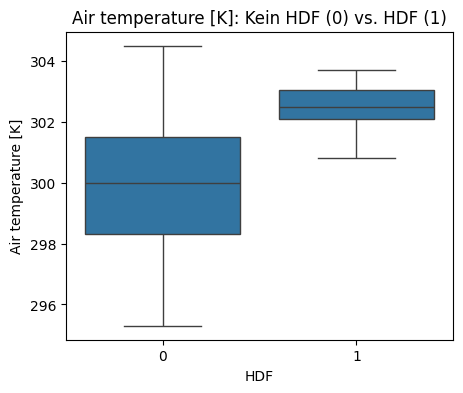

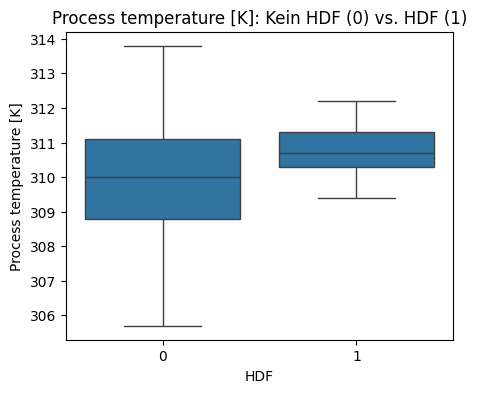

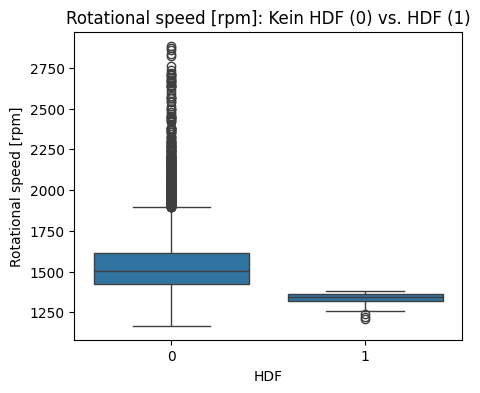

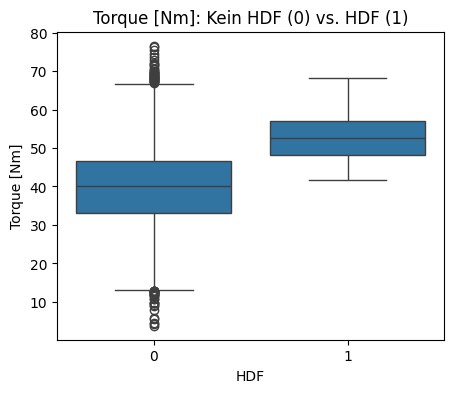

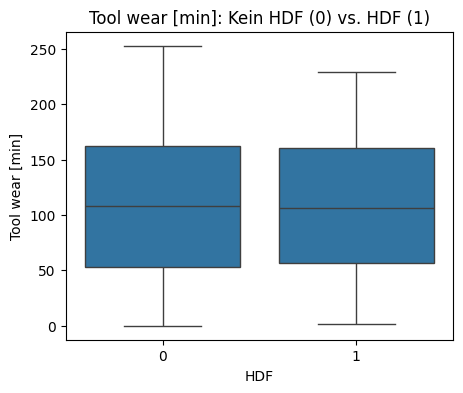

In [21]:
for feat in features:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x='HDF', y=feat, data=df)
    plt.title(f"{feat}: Kein HDF (0) vs. HDF (1)")
    plt.show()
